# <center> PPOL564 | Data Science 1: Foundations </center>
### <center> Project Presentation </center>
### <center> Analysis of factors that influence Food Insecurity </center> <br>



#### By      : Sonali Subbu Rathinam 
#### NetID : ss4608
#### Date   : 01/12/2021

### Problem Statement and Background:

<br>Despite *zero hunger* being a SDG (Sustainable Development Goals) target, moderate and severe food insecurity has increased over the years. Hence, this project aims at analysing the influence of the following factors on food insecurity across countries.<br><br>

- Arable Land (hectares per person)
- Cereal Yield (kilogram per hectare)
- Logistics Performance Indicator (An indicator of a country's trade and transport related infrastructure)
- Wage and Salaried Workers (% of total employment in a country)
- Climate Change Performance Index
- Poverty (Percent of Population earning below the national poverty line)
- Home Ownership Rate

The <b> Global Food Insecurity Index</b> measures food security across most countries of the world since 2012. This is used as the target variable of this project. It's on a scale of 100, hence a higher GFSI index implies lower food insecurity. 

The aforementioned factors are the predictor variables used in this project. There are many other factors that influence food insecurity. These factors were chosen as they are some of the main driving factors of food insecurity in most countries.

In [1]:
#Importing the required modules 

import pandas as pd
import numpy as np

#For Web-scraping 
import requests
from bs4 import BeautifulSoup
import wbdata #Importing world bank data

#For standardizing country names
import country_converter as cc

#For Imputing missing data
from sklearn.impute import KNNImputer

#For splitting the data
from sklearn.model_selection import train_test_split

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
#To display the entire dataframe
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#To be able to make modifications on subsets of dataframes
pd.options.mode.chained_assignment = None

#### Scraping the Target Variable - Global Food Insecurity Index

In [3]:
#This is the link of our target variable - Global Food Insecurity Index
url_target = "https://impact.economist.com/sustainability/project/food-security-index/Index/YoY"

In [4]:
# Downloading the web page
page_target = requests.get(url_target) 
page_target.status_code #Checking status - we got 200, so its good

200

In [5]:
soup_target = BeautifulSoup(page_target.content, 'html.parser') # Parsing
target_content = [i.get_text() for i in soup_target.find_all('table')] #Obtaining the table

In [6]:
print(target_content) #Checking what we got

["\n\n\nGlobal ranking\nCountry\n2012\n2013\n2014\n2015\n2016\n2017\n2018\n2019\n2020\n2021\n\nLast 10 Year change\n\n\n\n\n54th\nAlgeria\n\n53.2\n51.3\n57.4\n58.2\n62.9\n63.5\n63.3\n63.7\n61.6\n63.9\n\n\n\n98th\nAngola\n\n40.1\n40.9\n38.5\n40.2\n38.4\n38.1\n39.1\n40.6\n41.7\n41.1\n\n\n\n53rd\nArgentina\n\n61.0\n61.2\n61.5\n59.1\n64.2\n65.6\n66.9\n63.1\n63.1\n64.2\n\n\n\n=32nd\nAustralia\n\n70.9\n74.4\n76.5\n75.9\n77.1\n76.1\n78.1\n75.9\n73.9\n71.6\n\n\n\n2nd\nAustria\n\n79.6\n79.0\n79.0\n79.9\n79.6\n79.2\n78.7\n79.2\n80.1\n81.3\n\n\n\n56th\nAzerbaijan\n\n57.5\n61.2\n62.8\n64.5\n61.6\n58.9\n58.8\n61.9\n61.5\n62.6\n\n\n\n43rd\nBahrain\n\n63.2\n64.9\n67.1\n65.4\n65.8\n67.1\n67.8\n68.2\n68.4\n68.5\n\n\n\n84th\nBangladesh\n\n44.4\n47.7\n49.1\n50.2\n51.0\n53.4\n53.0\n50.8\n50.5\n49.1\n\n\n\n=36th\nBelarus\n\n64.0\n64.6\n67.5\n64.0\n67.9\n66.3\n71.5\n73.5\n70.4\n70.9\n\n\n\n19th\nBelgium\n\n76.1\n76.4\n77.1\n77.9\n77.5\n78.3\n78.1\n76.9\n76.9\n76.1\n\n\n\n93rd\nBenin\n\n39.9\n40.3\n41.8\n45.

In [7]:
#Output is one long string inside a list, so we are going to split it using a for loop
for i in target_content:
    temp1 = i.split("\n") #separating by the new line character
       

In [8]:
#Checking if we got desired result
print(temp1)

['', '', '', 'Global ranking', 'Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '', 'Last 10 Year change', '', '', '', '', '54th', 'Algeria', '', '53.2', '51.3', '57.4', '58.2', '62.9', '63.5', '63.3', '63.7', '61.6', '63.9', '', '', '', '98th', 'Angola', '', '40.1', '40.9', '38.5', '40.2', '38.4', '38.1', '39.1', '40.6', '41.7', '41.1', '', '', '', '53rd', 'Argentina', '', '61.0', '61.2', '61.5', '59.1', '64.2', '65.6', '66.9', '63.1', '63.1', '64.2', '', '', '', '=32nd', 'Australia', '', '70.9', '74.4', '76.5', '75.9', '77.1', '76.1', '78.1', '75.9', '73.9', '71.6', '', '', '', '2nd', 'Austria', '', '79.6', '79.0', '79.0', '79.9', '79.6', '79.2', '78.7', '79.2', '80.1', '81.3', '', '', '', '56th', 'Azerbaijan', '', '57.5', '61.2', '62.8', '64.5', '61.6', '58.9', '58.8', '61.9', '61.5', '62.6', '', '', '', '43rd', 'Bahrain', '', '63.2', '64.9', '67.1', '65.4', '65.8', '67.1', '67.8', '68.2', '68.4', '68.5', '', '', '', '84th', 'Bangladesh', ''

In [9]:
#We have split the contents of the string, now we are going to remove unnecessary content

temp_list1 =[] #Empty list that will later store the content 

for i in temp1: #For loop to iterate through our list
    if(i!=''):   #To remove spaces 
        if(i!="Last 10 Year change"):  #To remove this string
            temp_list1.append(i)       #Only appending the required content


In [10]:
#Now checking the result again
print(temp_list1)

['Global ranking', 'Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '54th', 'Algeria', '53.2', '51.3', '57.4', '58.2', '62.9', '63.5', '63.3', '63.7', '61.6', '63.9', '98th', 'Angola', '40.1', '40.9', '38.5', '40.2', '38.4', '38.1', '39.1', '40.6', '41.7', '41.1', '53rd', 'Argentina', '61.0', '61.2', '61.5', '59.1', '64.2', '65.6', '66.9', '63.1', '63.1', '64.2', '=32nd', 'Australia', '70.9', '74.4', '76.5', '75.9', '77.1', '76.1', '78.1', '75.9', '73.9', '71.6', '2nd', 'Austria', '79.6', '79.0', '79.0', '79.9', '79.6', '79.2', '78.7', '79.2', '80.1', '81.3', '56th', 'Azerbaijan', '57.5', '61.2', '62.8', '64.5', '61.6', '58.9', '58.8', '61.9', '61.5', '62.6', '43rd', 'Bahrain', '63.2', '64.9', '67.1', '65.4', '65.8', '67.1', '67.8', '68.2', '68.4', '68.5', '84th', 'Bangladesh', '44.4', '47.7', '49.1', '50.2', '51.0', '53.4', '53.0', '50.8', '50.5', '49.1', '=36th', 'Belarus', '64.0', '64.6', '67.5', '64.0', '67.9', '66.3', '71.5', '73.5', '70.4

In [11]:
#Now we have all the required content, so we are going to  store each country's data in a list to obtain a list of lists

count1 = 0                         #To keep track 
temp_list2 =[]                     #An empty list to use in the loop, which will hold each country's data
final_list =[]                     #This will be the final list of lists


for i in temp_list1:               #Loop to iterate through the content
    temp_list2.append(i)           #Appending the content to the empty list created above
    count1 = count1 +1             #Incrementing the count variable
    
    if (count1%12==0):             #We get information about the next country after 12 observations
        final_list.append(temp_list2)   #So each country's information stored in a list is append to the final list to obtain list of lists
        temp_list2=[]             #Clearing the contents of temp list after append statement

In [12]:
#Checking the result
print(final_list)

[['Global ranking', 'Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], ['54th', 'Algeria', '53.2', '51.3', '57.4', '58.2', '62.9', '63.5', '63.3', '63.7', '61.6', '63.9'], ['98th', 'Angola', '40.1', '40.9', '38.5', '40.2', '38.4', '38.1', '39.1', '40.6', '41.7', '41.1'], ['53rd', 'Argentina', '61.0', '61.2', '61.5', '59.1', '64.2', '65.6', '66.9', '63.1', '63.1', '64.2'], ['=32nd', 'Australia', '70.9', '74.4', '76.5', '75.9', '77.1', '76.1', '78.1', '75.9', '73.9', '71.6'], ['2nd', 'Austria', '79.6', '79.0', '79.0', '79.9', '79.6', '79.2', '78.7', '79.2', '80.1', '81.3'], ['56th', 'Azerbaijan', '57.5', '61.2', '62.8', '64.5', '61.6', '58.9', '58.8', '61.9', '61.5', '62.6'], ['43rd', 'Bahrain', '63.2', '64.9', '67.1', '65.4', '65.8', '67.1', '67.8', '68.2', '68.4', '68.5'], ['84th', 'Bangladesh', '44.4', '47.7', '49.1', '50.2', '51.0', '53.4', '53.0', '50.8', '50.5', '49.1'], ['=36th', 'Belarus', '64.0', '64.6', '67.5', '64.0', '67.9', '66.3', '7

In [13]:
#We have now got a list of lists as desired, now we will convert this to a dataframe
food_insecurity = pd.DataFrame(final_list)

#Checking the dataframe
display(food_insecurity)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Global ranking,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,54th,Algeria,53.2,51.3,57.4,58.2,62.9,63.5,63.3,63.7,61.6,63.9
2,98th,Angola,40.1,40.9,38.5,40.2,38.4,38.1,39.1,40.6,41.7,41.1
3,53rd,Argentina,61.0,61.2,61.5,59.1,64.2,65.6,66.9,63.1,63.1,64.2
4,=32nd,Australia,70.9,74.4,76.5,75.9,77.1,76.1,78.1,75.9,73.9,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...
109,78th,Uzbekistan,53.3,54.7,53.1,55.5,58.6,60.2,55.0,54.5,54.1,53.8
110,102nd,Venezuela,49.3,49.1,48.3,47.8,49.8,46.2,45.8,41.7,40.5,39.4
111,61st,Vietnam,53.9,58.9,62.1,62.2,63.0,59.6,62.9,62.3,62.7,61.1
112,112th,Yemen,35.7,35.2,34.9,40.2,36.4,36.0,34.7,35.2,35.2,35.7


In [14]:
#We have now got a dataframe, now we will make the first row as the header of the dataframe 

new_header = food_insecurity.iloc[0] #grab the first row for the header
food_insecurity = food_insecurity[1:] #take the data less the header row
food_insecurity.columns = new_header #set the header row as the df header

In [15]:
#Checking the dataframe
display(food_insecurity)

,Global ranking,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,54th,Algeria,53.2,51.3,57.4,58.2,62.9,63.5,63.3,63.7,61.6,63.9
2,98th,Angola,40.1,40.9,38.5,40.2,38.4,38.1,39.1,40.6,41.7,41.1
3,53rd,Argentina,61.0,61.2,61.5,59.1,64.2,65.6,66.9,63.1,63.1,64.2
4,=32nd,Australia,70.9,74.4,76.5,75.9,77.1,76.1,78.1,75.9,73.9,71.6
5,2nd,Austria,79.6,79.0,79.0,79.9,79.6,79.2,78.7,79.2,80.1,81.3
...,...,...,...,...,...,...,...,...,...,...,...,...
109,78th,Uzbekistan,53.3,54.7,53.1,55.5,58.6,60.2,55.0,54.5,54.1,53.8
110,102nd,Venezuela,49.3,49.1,48.3,47.8,49.8,46.2,45.8,41.7,40.5,39.4
111,61st,Vietnam,53.9,58.9,62.1,62.2,63.0,59.6,62.9,62.3,62.7,61.1
112,112th,Yemen,35.7,35.2,34.9,40.2,36.4,36.0,34.7,35.2,35.2,35.7


In [16]:
#Dropping the Global Ranking column
food_insecurity = food_insecurity.drop(['Global ranking'], axis=1)


In [17]:
#Converting this dataframe from wide to long format
food_insecurity = pd.melt(food_insecurity,id_vars=['Country'])

#Renaming column names
food_insecurity = food_insecurity.rename(columns={0: 'Year', "value" : "GFSI_Index"})  


In [18]:
#Check the dataframe after changes
food_insecurity.head()

,Country,Year,GFSI_Index
0,Algeria,2012,53.2
1,Angola,2012,40.1
2,Argentina,2012,61.0
3,Australia,2012,70.9
4,Austria,2012,79.6


In [19]:
#Need to ensure all the countries merge properly later, so we are going to create a function for converting to standard type

def func_cnames(df=None):
    """
    func_cnames takes in a dataframe, converts it into a list, changes the country names to short type, and then is converted
    back to a dataframe
    -------------------------------------------------------------------------------------------------------------------------
    Arguments:
    df -> Dataframe; its default value is None
    -------------------------------------------------------------------------------------------------------------------------
    Return:
    A dataframe
    """
    
    #Converting it to a list to perform some tasks
    list1 = df.values.tolist()
    
    #Converting the country name to name_short 
    for i in range(1, df.shape[0]):
        list1[i][0] = cc.convert(names=list1[i][0], to='name_short')
    
    df1 = pd.DataFrame(list1)
    return(df1)

In [20]:
#Calling function to standardize country-names
fi_final = func_cnames(food_insecurity)

In [21]:
#check the result
display(fi_final)

#Renaming column names
fi_final = fi_final.rename(columns={0: 'Country', 1 : "Year", 2 : "GFSI_Index"})  

,0,1,2
0,Algeria,2012,53.2
1,Angola,2012,40.1
2,Argentina,2012,61.0
3,Australia,2012,70.9
4,Austria,2012,79.6
...,...,...,...
1125,Uzbekistan,2021,53.8
1126,Venezuela,2021,39.4
1127,Vietnam,2021,61.1
1128,Yemen,2021,35.7


In [22]:
#Check data types 
fi_final.dtypes

Country       object
Year          object
GFSI_Index    object
dtype: object

In [23]:
#Change year to int type, this is done so that we can merge dataframes easily later
fi_final["Year"] = fi_final["Year"].astype(str).astype(int)

This is the target variable dataframe <br> <br> 
#### Let us now scrape each predictor variable

##### Obtaining World Bank Data

In [24]:
#Checking the topics in world bank data
wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [25]:
#Viewing indicators that are required
wbdata.get_indicator(topic=11)

id                     name
---------------------  -----------------------------------------------------------------------------------------------------------------
1.0.HCount.1.90usd     Poverty Headcount ($1.90 a day)
1.0.HCount.2.5usd      Poverty Headcount ($2.50 a day)
1.0.HCount.Mid10to50   Middle Class ($10-50 a day) Headcount
1.0.HCount.Ofcl        Official Moderate Poverty Rate-National
1.0.HCount.Poor4uds    Poverty Headcount ($4 a day)
1.0.HCount.Vul4to10    Vulnerable ($4-10 a day) Headcount
1.0.PGap.1.90usd       Poverty Gap ($1.90 a day)
1.0.PGap.2.5usd        Poverty Gap ($2.50 a day)
1.0.PGap.Poor4uds      Poverty Gap ($4 a day)
1.0.PSev.1.90usd       Poverty Severity ($1.90 a day)
1.0.PSev.2.5usd        Poverty Severity ($2.50 a day)
1.0.PSev.Poor4uds      Poverty Severity ($4 a day)
1.1.HCount.1.90usd     Poverty Headcount ($1.90 a day)-Rural
1.1.HCount.2.5usd      Poverty Headcount ($2.50 a day)-Rural
1.1.HCount.Mid10to50   Middle Class ($10-50 a day) Headcount-Rural

In [26]:
#Creating a dictionary of the required indicators
indicators = {
    "AG.LND.ARBL.HA.PC" : "Arable Land in Hectares per person",
    "AG.YLD.CREL.KG" :"Cereal yield (kg/hectare)",
    "SL.EMP.WORK.ZS" : "Wage and Salaried Employees",
    "SI.POV.NAHC":"Poverty at National Poverty Lines"
}

In [27]:
#Storing all the data in a dataframe
df_WB=wbdata.get_dataframe(indicators,country="all")
#Checking the dataframe
display(df_WB)

Arable Land in Hectares per person  \
country                     date                                       
Africa Eastern and Southern 2020                                 NaN   
                            2019                                 NaN   
                            2018                            0.184952   
                            2017                            0.189571   
                            2016                            0.195264   
...                                                              ...   
Zimbabwe                    1964                            0.470754   
                            1963                            0.475025   
                            1962                            0.479054   
                            1961                            0.482710   
                            1960                                 NaN   

                                  Cereal yield (kg/hectare)  \
country                     date                              
Africa Eastern and Southern 2020                        NaN   
                            2019                        NaN   
                            2018                1622.882922   
                            2017                1728.818670   
                            2016                1498.714700   
...                                                     ...   
Zimbabwe                    1964                 820.500000   
                            1963                 822.500000   
                            1962                 905.900000   
                            1961                 919.700000   
                            1960                        NaN   

                                  Wage and Salaried Employees  \
country                     date                                
Africa Eastern and Southern 2020                          NaN   
                            2019                    27.844263   
                            2018                    27.755236   
                            2017                    27.416973   
                            2016                    27.138512   
...                                                       ...   
Zimbabwe                    1964                          NaN   
                            1963                          NaN   
                            1962                          NaN   
                            1961                          NaN   
                            1960                          NaN   

                                  Poverty at National Poverty Lines  
country                     date                                     
Africa Eastern and Southern 2020                                NaN  
                            2019                                NaN  
                            2018                                NaN  
                            2017                                NaN  
                            2016                                NaN  
...                                                             ...  
Zimbabwe                    1964                                NaN  
                            1963                                NaN  
                            1962                                NaN  
                            1961                                NaN  
                            1960                                NaN  

[16226 rows x 4 columns]

In [28]:
#creates a copy of dataframe
df_wb=df_WB.copy() 
#Resetting the index
df_wb.reset_index(inplace=True)

In [29]:
#To check result
df_wb.sample(10)

,country,date,Arable Land in Hectares per person,Cereal yield (kg/hectare),Wage and Salaried Employees,Poverty at National Poverty Lines
2730,Sub-Saharan Africa,1974,0.433451,1047.738497,NaN,NaN
1450,Latin America & Caribbean,1973,0.341022,1611.352559,NaN,NaN
1493,Latin America & Caribbean (excluding high income),1991,0.292299,2102.166529,57.941801,NaN
12915,Rwanda,1976,0.155345,1097.400000,NaN,NaN
1381,Late-demographic dividend,1981,0.155762,2632.580507,NaN,NaN
15434,United Arab Emirates,2019,NaN,NaN,95.059998,NaN
7770,Grenada,1997,0.009846,1000.000000,NaN,NaN
9574,Kyrgyz Republic,1962,NaN,NaN,NaN,NaN
2486,Pre-demographic dividend,1974,0.456119,932.682807,NaN,NaN
8469,India,1969,0.294569,1053.700000,NaN,NaN


In [30]:
#change column name
df_wb = df_wb.rename(columns={'date': 'Year'})
df_wb.head()

,country,Year,Arable Land in Hectares per person,Cereal yield (kg/hectare),Wage and Salaried Employees,Poverty at National Poverty Lines
0,Africa Eastern and Southern,2020,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,2019,NaN,NaN,27.844263,NaN
2,Africa Eastern and Southern,2018,0.184952,1622.882922,27.755236,NaN
3,Africa Eastern and Southern,2017,0.189571,1728.818670,27.416973,NaN
4,Africa Eastern and Southern,2016,0.195264,1498.714700,27.138512,NaN


In [31]:
#Checking the number of observations for each year
df_wb.groupby("Year").size()

Year
1960    266
1961    266
1962    266
1963    266
1964    266
       ... 
2016    266
2017    266
2018    266
2019    266
2020    266
Length: 61, dtype: int64

In [32]:
#Checking data types
df_wb.dtypes

country                                object
Year                                   object
Arable Land in Hectares per person    float64
Cereal yield (kg/hectare)             float64
Wage and Salaried Employees           float64
Poverty at National Poverty Lines     float64
dtype: object

In [33]:
#Converting year to int type, so that it will be easy to merge later
df_wb["year"] = df_wb["Year"].astype(str).astype(int)

In [34]:
#Check result
display(df_wb)

,country,Year,Arable Land in Hectares per person,Cereal yield (kg/hectare),Wage and Salaried Employees,Poverty at National Poverty Lines,year
0,Africa Eastern and Southern,2020,NaN,NaN,NaN,NaN,2020
1,Africa Eastern and Southern,2019,NaN,NaN,27.844263,NaN,2019
2,Africa Eastern and Southern,2018,0.184952,1622.882922,27.755236,NaN,2018
3,Africa Eastern and Southern,2017,0.189571,1728.818670,27.416973,NaN,2017
4,Africa Eastern and Southern,2016,0.195264,1498.714700,27.138512,NaN,2016
...,...,...,...,...,...,...,...
16221,Zimbabwe,1964,0.470754,820.500000,NaN,NaN,1964
16222,Zimbabwe,1963,0.475025,822.500000,NaN,NaN,1963
16223,Zimbabwe,1962,0.479054,905.900000,NaN,NaN,1962
16224,Zimbabwe,1961,0.482710,919.700000,NaN,NaN,1961


In [35]:
#only including data from 2012
df_wb = df_wb[df_wb.year>2011]

In [36]:
#Dropping the column not required
df_wb = df_wb.drop(["Year"], axis=1)

In [37]:
#Function call to standardize country names, so that merging can be done properly
wb_final = func_cnames(df_wb)

In [38]:
#Renaming column names
wb_final = wb_final.rename(columns={0: 'Country', 1: "Arable_Land", 2 : "Cereal_Yield", 3 : "SalariedEmp", 4: "Poverty", 5: "Year"})

In [39]:
#Check result
wb_final.head()

,Country,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,Year
0,Africa Eastern and Southern,NaN,NaN,NaN,NaN,2020
1,not found,NaN,NaN,27.844263,NaN,2019
2,not found,0.184952,1622.882922,27.755236,NaN,2018
3,not found,0.189571,1728.818670,27.416973,NaN,2017
4,not found,0.195264,1498.714700,27.138512,NaN,2016


In [40]:
#Check for missing data
wb_final.isna().sum()

Country            0
Arable_Land      614
Cereal_Yield     795
SalariedEmp      514
Poverty         1927
Year               0
dtype: int64

We have obtained the required world bank data. Now, we will merge this with our target dataframe, and see how many missing 
values we have after the merge.

In [41]:
#Merge with food insecurity dataframe
merge1 = fi_final.merge(wb_final,how="left",on=["Country", "Year"])

In [42]:
#Checking result
display(merge1)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4
...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN


In [43]:
#Check for missing data
merge1.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land     339
Cereal_Yield    353
SalariedEmp     226
Poverty         791
dtype: int64

We obseve that the number of NA's has reduced, but they are still a lot in number

##### Obtaining Logistics Performance Indicator data

In [44]:
#Function for web-scraping the link for LPI

def func_lpi(url=None):
    """
    func_lpi will take in the url(as a string) as a parameter, parse using beautiful soup, and then use read_html to read 
    the required tables.
    ------------------------------------------------------------------------------------------------------------------------
    Arguments: 
    url -> The url to be scraped, it is a string; its default value is None
    ------------------------------------------------------------------------------------------------------------------------
    Return:
    A dataframe; which is basically the table scraped from the url
    """
    
    page_temp = requests.get(url)
    if(page_temp.status_code==200):#Checking if the web-page is obtained properly
        soup_temp = BeautifulSoup(page_temp.content, 'html.parser')
        t1 = soup_temp.findAll('table', {'class':"sticky-enabled"}) #This detail was found by inspecting the web-page
        df1 = pd.read_html(str(t1))
        df_l1 = pd.DataFrame(df1[0])
        return(df_l1)
    

In [45]:
#This are the urls for the LPI scores 

url_lpi2018 = "https://lpi.worldbank.org/international/global/2018.%202019"
url_lpi2016 = "https://lpi.worldbank.org/international/global/2016"
url_lpi2014 = "https://lpi.worldbank.org/international/global/2014"
url_lpi2012 = "https://lpi.worldbank.org/international/global/2012"

In [46]:
#We are going to call function for each url to obtain the final result

lpi2018 = func_lpi(url_lpi2018)
lpi2016 = func_lpi(url_lpi2016)
lpi2014 = func_lpi(url_lpi2014)
lpi2012 = func_lpi(url_lpi2012)


In [47]:
#Checking any one to see the results
display(lpi2016)

,Country,Year,LPI Rank,LPI Score,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,Logistics competence,Logistics competence.1,Tracking & tracing,Tracking & tracing.1,Timeliness,Timeliness.1
0,Germany,2016,1,4.23,2,4.12,1,4.44,8,3.86,1,4.28,3,4.27,2,4.45
1,Luxembourg,2016,2,4.22,9,3.90,4,4.24,1,4.24,10,4.01,8,4.12,1,4.80
2,Sweden,2016,3,4.20,8,3.92,3,4.27,4,4.00,2,4.25,1,4.38,3,4.45
3,Netherlands,2016,4,4.19,3,4.12,2,4.29,6,3.94,3,4.22,6,4.17,5,4.41
4,Singapore,2016,5,4.14,1,4.18,6,4.20,5,3.96,5,4.09,10,4.05,6,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Equatorial Guinea,2016,156,1.88,154,1.88,158,1.50,156,1.89,157,1.75,152,1.89,153,2.32
156,Mauritania,2016,157,1.87,131,2.14,157,1.54,154,2.00,158,1.74,159,1.54,157,2.14
157,Somalia,2016,158,1.75,159,1.29,156,1.57,157,1.86,156,1.85,160,1.51,152,2.35
158,Haiti,2016,159,1.72,158,1.70,159,1.47,159,1.81,159,1.68,158,1.56,160,2.02


We have now scraped the required LPI data

In [48]:
#Join two tables together
a = pd.concat([lpi2018,lpi2016],sort=False)
display(a)

,Country,Year,LPI Rank,LPI Score,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,Logistics competence,Logistics competence.1,Tracking & tracing,Tracking & tracing.1,Timeliness,Timeliness.1
0,Germany,2018,1,4.20,1,4.09,1,4.37,4,3.86,1,4.31,2,4.24,3,4.39
1,Sweden,2018,2,4.05,2,4.05,3,4.24,2,3.92,10,3.98,17,3.88,7,4.28
2,Belgium,2018,3,4.04,14,3.66,14,3.98,1,3.99,2,4.13,9,4.05,1,4.41
3,Austria,2018,4,4.03,12,3.71,5,4.18,3,3.88,6,4.08,7,4.09,12,4.25
4,Japan,2018,5,4.03,3,3.99,2,4.25,14,3.59,4,4.09,10,4.05,10,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Equatorial Guinea,2016,156,1.88,154,1.88,158,1.50,156,1.89,157,1.75,152,1.89,153,2.32
156,Mauritania,2016,157,1.87,131,2.14,157,1.54,154,2.00,158,1.74,159,1.54,157,2.14
157,Somalia,2016,158,1.75,159,1.29,156,1.57,157,1.86,156,1.85,160,1.51,152,2.35
158,Haiti,2016,159,1.72,158,1.70,159,1.47,159,1.81,159,1.68,158,1.56,160,2.02


In [49]:
#Join the other two tables together
b = pd.concat([lpi2014,lpi2012],sort=True)
display(b)

,Country,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,LPI Rank,LPI Score,Logistics competence,Logistics competence.1,Timeliness,Timeliness.1,Tracking & tracing,Tracking & tracing.1,Year
0,Germany,2,4.10,1,4.32,4,3.74,1,4.12,3,4.12,4,4.36,1,4.17,2014
1,Netherlands,4,3.96,3,4.23,11,3.64,2,4.05,2,4.13,6,4.34,6,4.07,2014
2,Belgium,11,3.80,8,4.10,2,3.80,3,4.04,4,4.11,2,4.39,4,4.11,2014
3,United Kingdom,5,3.94,6,4.16,12,3.63,4,4.01,5,4.03,7,4.33,5,4.08,2014
4,Singapore,3,4.01,2,4.28,6,3.70,5,4.00,8,3.97,9,4.25,11,3.90,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Nepal,125,2.20,149,1.87,151,1.86,151,2.04,146,2.12,153,2.21,149,1.95,2012
151,Chad,148,1.86,142,2.00,146,2.00,152,2.03,150,2.00,133,2.71,155,1.57,2012
152,Haiti,150,1.78,151,1.78,148,1.94,153,2.03,154,1.74,129,2.74,139,2.15,2012
153,Djibouti,154,1.72,154,1.51,154,1.77,154,1.80,153,1.84,154,2.19,153,1.73,2012


In [50]:
#Finally, join everything together
lpi_temp1 = pd.concat([a,b], ignore_index = True)
display(lpi_temp1)

,Country,Year,LPI Rank,LPI Score,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,Logistics competence,Logistics competence.1,Tracking & tracing,Tracking & tracing.1,Timeliness,Timeliness.1
0,Germany,2018,1,4.20,1,4.09,1,4.37,4,3.86,1,4.31,2,4.24,3,4.39
1,Sweden,2018,2,4.05,2,4.05,3,4.24,2,3.92,10,3.98,17,3.88,7,4.28
2,Belgium,2018,3,4.04,14,3.66,14,3.98,1,3.99,2,4.13,9,4.05,1,4.41
3,Austria,2018,4,4.03,12,3.71,5,4.18,3,3.88,6,4.08,7,4.09,12,4.25
4,Japan,2018,5,4.03,3,3.99,2,4.25,14,3.59,4,4.09,10,4.05,10,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,Nepal,2012,151,2.04,125,2.20,149,1.87,151,1.86,146,2.12,149,1.95,153,2.21
631,Chad,2012,152,2.03,148,1.86,142,2.00,146,2.00,150,2.00,155,1.57,133,2.71
632,Haiti,2012,153,2.03,150,1.78,151,1.78,148,1.94,154,1.74,139,2.15,129,2.74
633,Djibouti,2012,154,1.80,154,1.72,154,1.51,154,1.77,153,1.84,153,1.73,154,2.19


In [51]:
#Removing the rows that are not required 
lpi_temp1 = lpi_temp1.drop(lpi_temp1.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], axis=1)
display(lpi_temp1)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
630,Nepal,2012,2.04
631,Chad,2012,2.03
632,Haiti,2012,2.03
633,Djibouti,2012,1.80


In [52]:
#Since LPI scores are measured every two years, we are going to create rows for the odd years as well
lpi_repeated = pd.concat([lpi_temp1]*2, ignore_index=True)
display(lpi_repeated)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
1265,Nepal,2012,2.04
1266,Chad,2012,2.03
1267,Haiti,2012,2.03
1268,Djibouti,2012,1.80


In [53]:
#Check data types
lpi_repeated.dtypes

Country       object
Year           int64
LPI Score    float64
dtype: object

In [54]:
#Creating subset of data
lpi_temp2 = lpi_repeated.loc[635:]
display(lpi_temp2)

,Country,Year,LPI Score
635,Germany,2018,4.20
636,Sweden,2018,4.05
637,Belgium,2018,4.04
638,Austria,2018,4.03
639,Japan,2018,4.03
...,...,...,...
1265,Nepal,2012,2.04
1266,Chad,2012,2.03
1267,Haiti,2012,2.03
1268,Djibouti,2012,1.80


In [55]:
#Decrementing year value by 1, so we get data for the other years also
lpi_temp2['Year'] = lpi_temp2['Year']-1
display(lpi_temp2)

,Country,Year,LPI Score
635,Germany,2017,4.20
636,Sweden,2017,4.05
637,Belgium,2017,4.04
638,Austria,2017,4.03
639,Japan,2017,4.03
...,...,...,...
1265,Nepal,2011,2.04
1266,Chad,2011,2.03
1267,Haiti,2011,2.03
1268,Djibouti,2011,1.80


In [56]:
#This subset is the first half of the data
lpi_new = lpi_repeated.drop(lpi_repeated.index[635:])
display(lpi_new)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
630,Nepal,2012,2.04
631,Chad,2012,2.03
632,Haiti,2012,2.03
633,Djibouti,2012,1.80


In [57]:
#Now, we are combining both our subsets together
lpi_temp3 = pd.concat([lpi_new,lpi_temp2],sort=False)
display(lpi_temp3)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
1265,Nepal,2011,2.04
1266,Chad,2011,2.03
1267,Haiti,2011,2.03
1268,Djibouti,2011,1.80


In [58]:
#Function call to standardize country names, so that merging can be done properly
lpi_final = func_cnames(lpi_temp3)

In [59]:
#Renaming column names
lpi_final = lpi_final.rename(columns={0: 'Country', 1: "Year", 2 : "LPI_Score"}) 

In [60]:
#Check result
display(lpi_final)

,Country,Year,LPI_Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
1265,Nepal,2011,2.04
1266,Chad,2011,2.03
1267,Haiti,2011,2.03
1268,Djibouti,2011,1.80


In [61]:
#Checking data types
lpi_final.dtypes

Country       object
Year           int64
LPI_Score    float64
dtype: object

Merging the final LPI data with our previously merged dataframe

In [62]:
merge2 = merge1.merge(lpi_final,how="left",on=["Country", "Year"])


In [63]:
#Check the result
display(merge2)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4,3.89
...,...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN,NaN


In [64]:
#Check for missing data
merge2.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land     339
Cereal_Yield    353
SalariedEmp     226
Poverty         791
LPI_Score       372
dtype: int64

##### Scraping data on Poverty

In [65]:
#This is the link for the poverty index - another predictor variable
url_poverty = "https://en.wikipedia.org/wiki/List_of_countries_by_percentage_of_population_living_in_poverty"

In [66]:
page_poverty = requests.get(url_poverty)  #Download the page
page_poverty.status_code                  #Check status, it is 200, so that's good

200

In [67]:
soup_poverty = BeautifulSoup(page_poverty.content, 'html.parser') #Parsing
temp2 = soup_poverty.findAll('table', {'class':"wikitable"})  #Finding tables
print(len(temp2)) #Checking the number of tabkes

2


In [68]:
#The required table is the first one - so its index is 1
t2 = temp2[1]

#Now we are reading the table, and converting it to a dataframe
df_temp2 = pd.read_html(str(t2))
df_poverty = pd.DataFrame(df_temp2[0])
display(df_poverty)

,Country,WorldBank[16],Year,CIA[17],Year.1,Other,Year.2,Continent
0,Afghanistan,54.5%,2016.0,54.5%,2017.0,NaN,NaN,Asia
1,Albania,14.3%,2012.0,14.3%,2012.0,NaN,NaN,Europe
2,Algeria,5.5%,2011.0,5.5%,2011.0,NaN,NaN,Africa
3,Angola,32.3%,2018.0,32.3%,2018.0,NaN,NaN,Africa
4,Anguilla,NaN,NaN,23.0%,2002.0,NaN,NaN,North America
...,...,...,...,...,...,...,...,...
178,"Virgin Islands, U.S.",NaN,NaN,28.9%,2002.0,NaN,NaN,North America
179,West Bank,NaN,NaN,18.0%,2011.0,NaN,NaN,Asia
180,Yemen,48.6%,2014.0,48.6%,2014.0,NaN,NaN,Asia
181,Zambia,54.4%,2015.0,54.4%,2015.0,NaN,NaN,Africa


In [69]:
#Function call to standardize country names, so that merging can be done properly
poverty_final = func_cnames(df_poverty)

In [70]:
#Renaming column names
poverty_final = poverty_final.rename(columns={0: 'Country', 1: "WorldBank", 2 : "Year_WB", 3: "CIA", 4: "Year_CIA"}) 

In [71]:
#Remove columns not required
poverty_final = poverty_final.drop([5, 6, 7], axis=1)


In [72]:
#Check the final result
poverty_final.head()

,Country,WorldBank,Year_WB,CIA,Year_CIA
0,Afghanistan,54.5%,2016.0,54.5%,2017.0
1,Albania,14.3%,2012.0,14.3%,2012.0
2,Algeria,5.5%,2011.0,5.5%,2011.0
3,Angola,32.3%,2018.0,32.3%,2018.0
4,Anguilla,NaN,NaN,23.0%,2002.0


Merging this with our previously merged dataframe, to try to reduce the number of NA's in the Poverty column.

In [73]:
#Merging with the previously merged data
merge3 = merge2.merge(poverty_final,how="left", on="Country")


In [74]:
#Check result
merge3.head()

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score,WorldBank,Year_WB,CIA,Year_CIA
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41,5.5%,2011.0,5.5%,2011.0
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28,32.3%,2018.0,32.3%,2018.0
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05,35.5%,2019.0,35.5%,2019.0
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73,NaN,NaN,NaN,NaN
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4,3.89,NaN,NaN,13.3%,2018.0


In [75]:
#Checking the number of missing data
merge3.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land     339
Cereal_Yield    353
SalariedEmp     226
Poverty         791
LPI_Score       372
WorldBank       300
Year_WB         300
CIA             100
Year_CIA        100
dtype: int64

In [76]:
#Converting the dataframe to a list to modify it
list2 = merge3.values.tolist()

In [77]:
#For loop to iterate through the data, check if the Food security year and World Bank year are the same, 
#if they are the same, and the poverty column has NA value, then it is replaced with the value in the WorldBank column

for i in range(1, merge3.shape[0]):   #To iterate through the dataframe
    if(list2[i][1]==list2[i][9]):     #To check if it is the same year
        if(pd.isna(list2[i][6])):     #To check if the poverty column is NA
            list2[i][6]=list2[i][8]   #Change the NA value to the value in WorldBank column

In [78]:
#For loop to iterate through the data, check if the Food security year and CIA year are the same, 
#if they are the same, and the poverty column has NA value, then it is replaced with the value in the CIA column

for i in range(1, merge3.shape[0]):   #To iterate through the dataframe 
    if(list2[i][1]==list2[i][11]):    #To check if it is the same year
        if(pd.isna(list2[i][6])):     #To check if the poverty column is NA
            list2[i][6]=list2[i][10]  #Change the NA value to the value in CIA column

In [79]:
#Changing back to a dataframe
df_changed = pd.DataFrame(list2)
df_changed.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41,5.5%,2011.0,5.5%,2011.0
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28,32.3%,2018.0,32.3%,2018.0
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05,35.5%,2019.0,35.5%,2019.0
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73,NaN,NaN,NaN,NaN
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4,3.89,NaN,NaN,13.3%,2018.0


In [80]:
#Change the name of the columns
df_changed = df_changed.rename(columns={0: 'Country', 1: "Year", 2 : "GFSI_Index", 3: "Arable_Land", 4: "Cereal_Yield", 
                                        5: "SalariedEmp", 6: "Poverty", 7: "LPI_Score"}) 

In [81]:
#Remove columns not required
df_changed = df_changed.drop([8, 9, 10, 11], axis=1)

In [82]:
#Checking the number of missing data
df_changed.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land     339
Cereal_Yield    353
SalariedEmp     226
Poverty         778
LPI_Score       372
dtype: int64

We observe that the above steps have removed 13 NA values from the Poverty column. It's not a lot, but something is better than nothing. 

In [83]:
#Checking the result
df_changed.head()

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4,3.89


##### Scraping the climate change performance index

In [84]:
#This the link for climate change index - this is one of the predictor variables of the model
url_ci="https://en.wikipedia.org/wiki/Climate_Change_Performance_Index"

In [85]:
page_ci = requests.get(url_ci)   #Download the web-page
page_ci.status_code              #Check status of download

200

In [86]:
soup_ci = BeautifulSoup(page_ci.content, 'html.parser')  #Parsing

#Obtaining tables
t3 = soup_ci.findAll('table', {'class':"wikitable"})
print(len(t3))

4


In [87]:
#The required table is the last one - so its index is 3 
temp3 = t3[3]

#Now, we are reading in the table, and converting it to dataframe
df_temp3 = pd.read_html(str(temp3))
df_ci = pd.DataFrame(df_temp3[0])
display(df_ci)

,Rank,Country,Score
0,1,-,-
1,2,-,-
2,3,-,-
3,4,Sweden,76
4,5,Morocco,70.48
5,6,Lithuania,70.47
6,7,Latvia,68.31
7,8,United Kingdom,65.92
8,9,Switzerland,65.42
9,10,Malta,65.06


In [88]:
#Removing Rank Column 
df_ci = df_ci.drop(['Rank'], axis=1)

#To remove the first three rows
df_ci = df_ci[df_ci.Country != "-"]


In [89]:
#Check result
df_ci.head()

,Country,Score
3,Sweden,76
4,Morocco,70.48
5,Lithuania,70.47
6,Latvia,68.31
7,United Kingdom,65.92


In [90]:
#Function call to standardize country names, so that merging can be done properly
ci_final = func_cnames(df_ci)

In [91]:
#Renaming column names
ci_final = ci_final.rename(columns={0: 'Country', 1: "CCPI"}) 

In [92]:
#To check result
ci_final.head()

,Country,CCPI
0,Sweden,76
1,Morocco,70.48
2,Lithuania,70.47
3,Latvia,68.31
4,United Kingdom,65.92


Merging this dataframe with our previously merged dataframe. The Climate Change Performance Index (CCPI) column will then be changed into 0/1, where 0 corresponds to 'No record of CCPI' and 1 corresponds to CCPI recorded. Countries that allow for report of CCPI index have higher probability of working towards climate change concerns, and this factor is included for our analysis of food insecurity.

In [93]:
#Merging the dataframes
merge4 = df_changed.merge(ci_final,how="left",on="Country")

In [94]:
#Check the result
display(merge4)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score,CCPI
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41,42.10
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28,NaN
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05,49.01
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73,31.27
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4,3.89,48.78
...,...,...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN,NaN,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN,NaN,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN,NaN,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#Modify Column to 0 and 1
merge4['CCPI'] = merge4['CCPI'].apply(lambda x: 0 if  pd.isna(x) else 1)

#Check result
merge4.head()

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score,CCPI
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41,1
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28,0
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05,1
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73,1
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4,3.89,1


##### Home Ownership Rate

In [96]:
#This is the link for home ownership rate - another predictor variable
url_home = "https://tradingeconomics.com/country-list/home-ownership-rate"

In [97]:
page_home = requests.get(url_home)  #Download the page
page_home.status_code               #Check the status

200

In [98]:
soup_home = BeautifulSoup(page_home.content, 'html.parser') #Parsing

In [99]:
#Reading in the table
temp4 = pd.read_html(url_home)
df_home=pd.concat(temp4)
display(df_home)

,Country,Last,Previous,Reference,Unit
0,Australia,66.20,67.5,Dec/18,%
1,Austria,55.20,55.4,Dec/19,%
2,Belgium,71.30,72.3,Dec/19,%
3,Bulgaria,84.30,84.1,Dec/20,%
4,Canada,68.55,66.3,Dec/18,%
5,Croatia,89.70,90.1,Dec/19,%
6,Cyprus,67.90,70.1,Dec/19,%
7,Czech Republic,78.60,78.7,Dec/19,%
8,Denmark,60.80,60.5,Dec/19,%
9,Estonia,81.70,82.4,Dec/19,%


In [100]:
#Splitting the Reference column to get month and year
df_home[['Month', 'Year']] = df_home.Reference.str.split("/", expand=True)

In [101]:
#Adding 20 to make sure it is a complete year
df_home['year'] = "20" + df_home['Year'].astype(str)

In [102]:
#Checking results
df_home.head()

,Country,Last,Previous,Reference,Unit,Month,Year,year
0,Australia,66.20,67.5,Dec/18,%,Dec,18,2018
1,Austria,55.20,55.4,Dec/19,%,Dec,19,2019
2,Belgium,71.30,72.3,Dec/19,%,Dec,19,2019
3,Bulgaria,84.30,84.1,Dec/20,%,Dec,20,2020
4,Canada,68.55,66.3,Dec/18,%,Dec,18,2018


In [103]:
#Drop the columns not required
df_home = df_home.drop(['Reference', 'Unit', 'Month', 'Year'], axis=1)


In [104]:
#Check results
df_home.head()

,Country,Last,Previous,year
0,Australia,66.20,67.5,2018
1,Austria,55.20,55.4,2019
2,Belgium,71.30,72.3,2019
3,Bulgaria,84.30,84.1,2020
4,Canada,68.55,66.3,2018


In [105]:
#Creating a copy of each row, this is because we have two years value in one row, and we want to split it
home_repeated = pd.concat([df_home]*2, ignore_index=True)


In [106]:
#Check data types
home_repeated.dtypes

Country      object
Last        float64
Previous    float64
year         object
dtype: object

In [107]:
#Changing data types so that appropriate edits can be made
home_repeated["year"] = home_repeated["year"].astype(str).astype(int)

home_repeated["Previous"] = home_repeated["Previous"].astype(str)
home_repeated["Last"] = home_repeated["Last"].astype(str)

In [108]:
#Creating subset of data
home3 = home_repeated.loc[49:97]

In [109]:
#Check result
home3.head()

,Country,Last,Previous,year
49,Australia,66.2,67.5,2018
50,Austria,55.2,55.4,2019
51,Belgium,71.3,72.3,2019
52,Bulgaria,84.3,84.1,2020
53,Canada,68.55,66.3,2018


In [110]:
#Decrementing year value by 1, so this will corresspond to the 'Previous year' value
home3['year'] = home3['year']-1

In [111]:
#Dropping the last column from this subset
home3 = home3.drop(['Last'], axis=1)

In [112]:
#Creating a common column name
home3 = home3.rename(columns={'Previous': 'HomeOwn_Rate'})  

In [113]:
#This subset is the first half of the data
home_new = home_repeated.drop(home_repeated.index[49:])

In [114]:
#Dropping previous from this subset
home_new = home_new.drop(['Previous'], axis=1)

In [115]:
#Creating a common column name
home_new = home_new.rename(columns={'Last': 'HomeOwn_Rate'})  

In [116]:
#Now, we are combining both our subsets together
home_rate = pd.concat([home_new,home3],sort=False)

In [117]:
#Checking final result
display(home_rate)

,Country,HomeOwn_Rate,year
0,Australia,66.2,2018
1,Austria,55.2,2019
2,Belgium,71.3,2019
3,Bulgaria,84.3,2020
4,Canada,68.55,2018
...,...,...,...
93,Sweden,63.6,2019
94,Switzerland,42.5,2018
95,Turkey,59.0,2018
96,United Kingdom,65.0,2017


In [118]:
#Function call to standardize country names, so that merging can be done properly
home_final = func_cnames(home_rate)

In [119]:
#Renaming column names
home_final = home_final.rename(columns={0: 'Country', 1: "HomeOwn_Rate", 2 : "Year"}) 

In [120]:
#Check the final dataframe 
home_final.head()

,Country,HomeOwn_Rate,Year
0,Australia,66.2,2018
1,Austria,55.2,2019
2,Belgium,71.3,2019
3,Bulgaria,84.3,2020
4,Canada,68.55,2018


In [121]:
#Merging with the previosly merged dataframe
merge5 = merge4.merge(home_final, how="left", on =["Country", "Year"])

#Check the result
display(merge5)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score,CCPI,HomeOwn_Rate
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41,1,NaN
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28,0,NaN
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05,1,NaN
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73,1,NaN
4,Austria,2012,79.6,0.160748,6002.9,86.930000,14.4,3.89,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN,NaN,0,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN,NaN,0,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN,NaN,0,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN,NaN,0,NaN


In [122]:
#We observe that few poverty values for some countries have % with them, so we will remove it
merge5[['Poverty', 'PercentSign']] = merge5.Poverty.str.split("%", expand=True)

In [123]:
#Now we will drop the PercentSign column 
df_final = merge5.drop(['PercentSign'], axis=1)

In [124]:
#This is our final dataframe
display(df_final)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score,CCPI,HomeOwn_Rate
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41,1,NaN
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28,0,NaN
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05,1,NaN
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73,1,NaN
4,Austria,2012,79.6,0.160748,6002.9,86.930000,NaN,3.89,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN,NaN,0,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN,NaN,0,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN,NaN,0,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN,NaN,0,NaN


In [125]:
df_final.isna().sum()

Country            0
Year               0
GFSI_Index         0
Arable_Land      339
Cereal_Yield     353
SalariedEmp      226
Poverty         1117
LPI_Score        372
CCPI               0
HomeOwn_Rate    1064
dtype: int64

In [126]:
#Only keep rows with atleast seven non NA values
df_final = df_final.dropna(how="all", axis=0,thresh=7)


In [127]:
#Check the result
display(df_final)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,Poverty,LPI_Score,CCPI,HomeOwn_Rate
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,NaN,2.41,1,NaN
1,Angola,2012,40.1,0.187192,552.0,27.889999,NaN,2.28,0,NaN
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,NaN,3.05,1,NaN
3,Australia,2012,70.9,1.391666,2231.6,82.830002,NaN,3.73,1,NaN
4,Austria,2012,79.6,0.160748,6002.9,86.930000,NaN,3.89,1,NaN
...,...,...,...,...,...,...,...,...,...,...
786,Uzbekistan,2018,55.0,0.123331,4055.9,64.809998,NaN,2.58,0,NaN
787,Venezuela,2018,45.8,0.090006,3395.0,58.820000,NaN,2.23,0,NaN
788,Vietnam,2018,62.9,0.073141,5685.4,43.939999,NaN,3.27,0,NaN
789,Yemen,2018,34.7,0.038518,759.2,45.299999,NaN,2.27,0,NaN


In [128]:
#Check the number of missing data
df_final.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land       0
Cereal_Yield     14
SalariedEmp       0
Poverty         780
LPI_Score        33
CCPI              0
HomeOwn_Rate    759
dtype: int64

In [129]:
#Checking the number of observations for each year
df_final.groupby("Year").size()

Year
2012    113
2013    113
2014    113
2015    113
2016    113
2017    113
2018    113
dtype: int64

In [130]:
#Dropping NA from Cereal Yield and LPI Score, Values will be imputed for Poverty and HomeOwn_Rate
df_final = df_final.dropna(subset=['Cereal_Yield', 'LPI_Score'])

Now, Poverty and HomeOwn_Rate missing values shall be imputed

In [131]:
#Imputing using KNN with 30 nearest neighbours
imputer = KNNImputer(n_neighbors=30)
imputer.fit(df_final[['Poverty', 'HomeOwn_Rate']])

KNNImputer(n_neighbors=30)

In [132]:
#Transforming to complete imputation steps
df_trans1 = imputer.transform(df_final[['Poverty', 'HomeOwn_Rate']])
df_trans2 = pd.DataFrame(df_trans1, index=df_final.index)


In [133]:
#Checking result
display(df_trans2)

,0,1
0,33.15,71.114516
1,33.15,71.114516
2,33.15,71.114516
3,33.15,71.114516
4,33.15,71.114516
...,...,...
786,33.15,71.114516
787,33.15,71.114516
788,33.15,71.114516
789,33.15,71.114516


In [134]:
#Renaming columns
df_trans2 = df_trans2.rename(columns={0 : 'Poverty', 1:'HomeOwn_Rate'})

In [135]:
#Dropping these columns from main dataframe
df_final = df_final.drop(['Poverty', 'HomeOwn_Rate'], axis=1)

#Merging to add the imputed values to main dataframe
df_final = pd.merge(df_final, df_trans2, left_index=True, right_index=True)

In [136]:
#Checking result
display(df_final)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,CCPI,Poverty,HomeOwn_Rate
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,2.41,1,33.15,71.114516
1,Angola,2012,40.1,0.187192,552.0,27.889999,2.28,0,33.15,71.114516
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,3.05,1,33.15,71.114516
3,Australia,2012,70.9,1.391666,2231.6,82.830002,3.73,1,33.15,71.114516
4,Austria,2012,79.6,0.160748,6002.9,86.930000,3.89,1,33.15,71.114516
...,...,...,...,...,...,...,...,...,...,...
786,Uzbekistan,2018,55.0,0.123331,4055.9,64.809998,2.58,0,33.15,71.114516
787,Venezuela,2018,45.8,0.090006,3395.0,58.820000,2.23,0,33.15,71.114516
788,Vietnam,2018,62.9,0.073141,5685.4,43.939999,3.27,0,33.15,71.114516
789,Yemen,2018,34.7,0.038518,759.2,45.299999,2.27,0,33.15,71.114516


### <center>Data Collection and Wrangling </center><br>
Data was obtained using either of the following methods:<br> 
- Web-scraping using BeautifulSoup package.
- Web-scraping using pd.read_html() function.
- Using wbdata, to obtain world bank data.

Data wrangling steps included: <br>
- Using country convertor to ensure all country names are in a standard form, and to merge dataframes correctly.
- Merging all the individuals dataframes obtained during data collection, and only retaining rows that had atleast 70% Non NA   values.
- Reducing the number of NA values by obtaining data on the same predictor variables from different sources and modifying the dataframe.
- Imputing the remaining missing data using KNN Imputer. However, most of the NA values have the same value after imputing, even after trying different neighbours. Hence, other alternative ways of imputing such Stochastic Regression Imputation or Multivariate Imputation by Chained Equation (MICE) needs to be explored.  

In [137]:
#To analyze which of these predictors best describe the value of food security index, country and year column will be dropped
df_use = df_final.drop(['Country', 'Year'], axis=1)

#Check result
display(df_use)

,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,CCPI,Poverty,HomeOwn_Rate
0,53.2,0.200795,1677.6,68.029999,2.41,1,33.15,71.114516
1,40.1,0.187192,552.0,27.889999,2.28,0,33.15,71.114516
2,61.0,0.952573,4146.2,77.010002,3.05,1,33.15,71.114516
3,70.9,1.391666,2231.6,82.830002,3.73,1,33.15,71.114516
4,79.6,0.160748,6002.9,86.930000,3.89,1,33.15,71.114516
...,...,...,...,...,...,...,...,...
786,55.0,0.123331,4055.9,64.809998,2.58,0,33.15,71.114516
787,45.8,0.090006,3395.0,58.820000,2.23,0,33.15,71.114516
788,62.9,0.073141,5685.4,43.939999,3.27,0,33.15,71.114516
789,34.7,0.038518,759.2,45.299999,2.27,0,33.15,71.114516


The final dataframe obtained includes data from 111 countries across 7 years (2012 - 2018). There are a total of 744 rows. 

In [138]:
df_final.sample(3)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,CCPI,Poverty,HomeOwn_Rate
291,New Zealand,2014,77.2,0.130632,8033.9,84.720001,3.64,1,33.15,71.114516
515,Nepal,2016,50.7,0.077529,2605.4,20.850000,2.38,0,33.15,71.114516
207,Switzerland,2013,78.9,0.049806,5945.6,84.669998,3.84,1,33.15,71.114516


Supervised statistical models will be used on this data to analyse which factors strongly influence and impact the variable of interest, the GFSI index. Supervised learning models for regression will be used as input/predictor and output/target variables are available and labelled The models that will be considered are:

- Linear Regression
- Support Vector Regression
- Decision Trees
- Random Forest

The project also aims at using CNN (Convolutional neural network), and comparing its metrics with that of the aforementioned supervised learning models, if it is possible.

In [139]:
#To split the data 
y = df_use[['GFSI_Index']]
X = df_use.drop(columns=['GFSI_Index'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

In [140]:
#Checking the split
print(train_X.shape[0]/df_use.shape[0])
print(test_X.shape[0]/df_use.shape[0])


0.75
0.25


In [141]:
#Checking the types
train_X.dtypes

Arable_Land     float64
Cereal_Yield    float64
SalariedEmp     float64
LPI_Score       float64
CCPI              int64
Poverty         float64
HomeOwn_Rate    float64
dtype: object

In [142]:
#Converting CCPI to category type
for col in ['CCPI']:
    train_X[col] = train_X[col].astype('category')

In [143]:
# Plot the continuous Variables 
temp1 = train_X.select_dtypes(include=["float64"]).melt()

v1 =(
    ggplot(temp1,aes(x="value")) +
    geom_histogram(bins=30, color ="black", fill="lightblue") +
    facet_wrap("variable",scales='free') +
    theme_bw()+
    theme(figure_size=(8,6),
          subplots_adjust={'wspace':0.25, 'hspace':0.25})
)

## <center> Results </center>

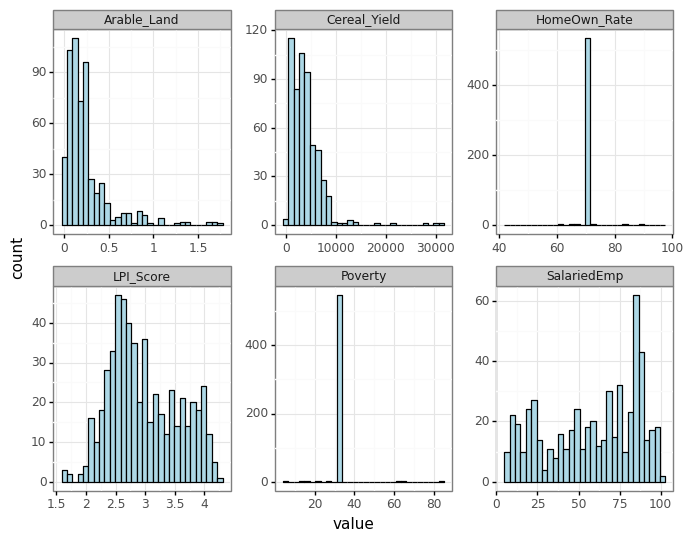

In [144]:
print(v1)

From the previous visualisations of the continous variables in the model, it is clear that the imputation for Poverty and Home Ownership Rates have not been very successful. Hence, other forms of imputations and other methods of filling NAs (finding other data sources for these variables) must be done. We also observe a right skew in Arable Land and Cereal Yield predictors. Hence, they will be logged before employing the models. 

Clearly, Poverty and HomeOwn_Rate graphs seem different because of the imputation.

In [145]:
temp2 = train_X.select_dtypes(include="category").melt()

v2 = (
    ggplot(temp2,aes(x="value")) +
    geom_bar(color="black", fill="lightblue", width=0.25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(3,3),
         axis_text_x=element_text(rotation=45, hjust=1))
)

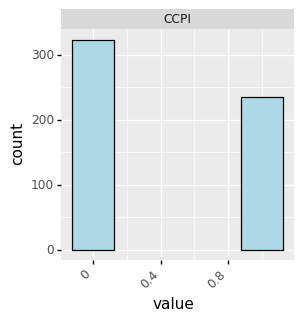

In [146]:
print(v2)

From the above visualisation of the categorical variable, it is clear that there are fewer countries who report their Climate Change Performance Indices over the years. 

So, we have more 0 than 1 in this category

In [147]:
D = train_X[['Arable_Land', 'Cereal_Yield', 'SalariedEmp', 'LPI_Score']]
D['GFSI_Index'] = train_y
print(D)

     Arable_Land  Cereal_Yield  SalariedEmp  LPI_Score GFSI_Index
23      0.034248        3695.1    46.820000       2.87       63.2
475     0.036455        4342.4    48.869999       2.61       64.7
397     0.367629        1575.5    17.740000       2.50       50.4
648     0.207531        1275.0    34.950001       2.25       46.7
447     0.130918        4851.7    61.730000       2.40       55.5
..           ...           ...          ...        ...        ...
246     0.380574         855.7     9.490000       2.53       35.9
486     0.408713        3573.3    85.970001       3.92       84.1
511     0.179732        3748.7    68.339996       3.11       64.2
526     0.113432        4187.5    45.410000       2.89       65.1
490     0.198590        4223.5    65.910004       3.24       75.4

[558 rows x 5 columns]


In [148]:
#Checking the data types
D.dtypes

Arable_Land     float64
Cereal_Yield    float64
SalariedEmp     float64
LPI_Score       float64
GFSI_Index       object
dtype: object

In [149]:
#Convert the Index to numeric type to be able to plot it. 
D["GFSI_Index"] = pd.to_numeric(D["GFSI_Index"])


In [150]:
v3 = (
    ggplot(D.melt(id_vars=["GFSI_Index"]),
           aes(x="value",y="GFSI_Index"))+
    geom_point(alpha=.5, color="red", size=0.5) +
    facet_wrap("variable",scales="free") +
    theme_bw() +
    theme(figure_size = (6.5,6.5), subplots_adjust={'wspace':0.25, 'hspace':0.25}) +
    scale_y_continuous(limits=[30, 86])
    
)

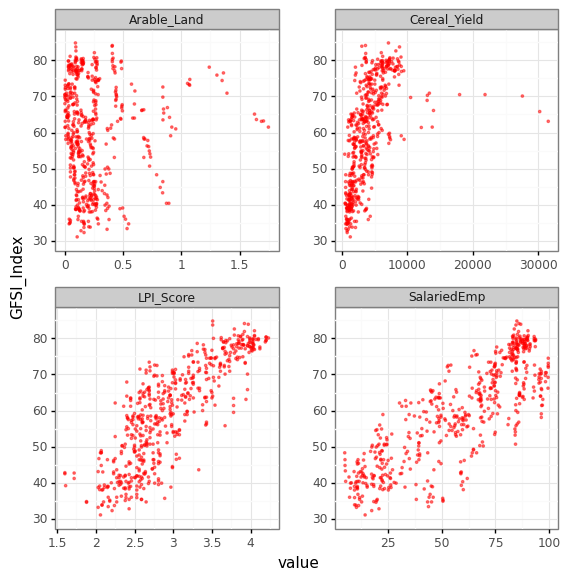

In [151]:
print(v3)

The previous visualisations were a representation of how the continous variables relate to the outcome, the GFSI index. We observe a strong positive relation between the LPI Scores and Salaried Employees with the GFSI index. Most countries tend to have similar values of Arable Land and Cereal Yield, but exhibit different values of GFSI index, along with a few outliers having higher values of the predictor variables.

## <center> Lessons Learnt and Plans to Mitigate </center>

- Importance of using country convertor package
- Better understanding of web-scraping and data wrangling (especially merging and column binding)
- Learning to deal with missing data and the different methods of imputation that can be used. 

### <center> Thank You </center>